<h1>Capstone Project - The Battle of the Neighborhoods </h1>
    



**Import required libraries**



In [3]:

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium==0.5.0
import folium # map rendering library

#import beautiful soup
from urllib.request import urlopen
from bs4 import BeautifulSoup


print('Libraries imported.')

  Found existing installation: folium 0.11.0
    Uninstalling folium-0.11.0:
      Successfully uninstalled folium-0.11.0
  Running setup.py install for folium: started
    Running setup.py install for folium: finished with status 'done'


You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Libraries imported.


In [4]:
import numpy as np 

**Download and Explore New York Dataset**

New York has a total of 5 boroughs and 306 neighborhoods. In order to explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. Luckily, this dataset exists for free on the web https://geo.nyu.edu/catalog/nyu_2451_34572. I have downloaded this dataset nyu-2452-34572-geojson.json to my computer and stored in the same folder as that of this notebook

lets load datset

In [5]:
with open('nyu-2451-34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)

**Relevant data is in the features key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.**



In [8]:
neighborhoods_data = newyork_data['features']

In [9]:
#Let's take a look at the first item in this list.
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

**Tranform the data into a pandas dataframe**


In [10]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

# let's loop through the data and fill the dataframe one row at a time.

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [11]:
pd.set_option('max_colwidth', -1)


c:\users\intel corei3\pycharmprojects\practice\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [12]:
neighborhoods.head()


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Make sure that the dataset has all 5 boroughs and 306 neighborhoods.



In [13]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [ ]:
location = geolocator.geocode('New York City', timeout=None)


**Use geopy library to get the latitude and longitude values of New York City**


In [24]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


**Create a map of New York with neighborhoods superimposed on top.**

In [25]:
# create map of New York using latitude and longitude values

map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

As the problem we are going to solve using FourSqare API is find out Italian Restaurents with more likes in Manhattan, let's slice the original dataframe and create a new dataframe of the Manhattan data.



In [26]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)


Let's check size of Manhattan data



In [27]:
manhattan_data.shape


(40, 4)

In [28]:
manhattan_data.head(10)


,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688
5,Manhattan,Manhattanville,40.816934,-73.957385
6,Manhattan,Central Harlem,40.815976,-73.943211
7,Manhattan,East Harlem,40.792249,-73.944182
8,Manhattan,Upper East Side,40.775639,-73.960508
9,Manhattan,Yorkville,40.775930,-73.947118


Use geopy library to get the latitude and longitude values of of Manhattan.

As we did with all of New York City, let's visualize Manhattan and the neighborhoods in it.

In [29]:
address = 'Manhattan, NY'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

c:\users\intel corei3\pycharmprojects\practice\venv\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [30]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods to find Italian restaurents.

Accessing Foursquare API

First, let's create the GET request URL. Name your URL url.

Define Foursquare Credentials and Version

In [31]:
CLIENT_ID = 'C05BER4ZVD1U55KF13JLMSF4VTQMDDBB0L5F4WOCI5HUFZ3F' # Foursquare ID
CLIENT_SECRET = 'ZRZ4SKO1OIAVL32XYUVD354FL3ED4RL1HXS1C1ETBMQOTNNP' # Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
radius = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: C05BER4ZVD1U55KF13JLMSF4VTQMDDBB0L5F4WOCI5HUFZ3F
CLIENT_SECRET:ZRZ4SKO1OIAVL32XYUVD354FL3ED4RL1HXS1C1ETBMQOTNNP


In [32]:
search_query = 'Italian restaurent'
radius = 5000
print(search_query + ' .... OK!')

Italian restaurent .... OK!


Define Url to make FourSquare API to retreive venues with search query



In [33]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=C05BER4ZVD1U55KF13JLMSF4VTQMDDBB0L5F4WOCI5HUFZ3F&client_secret=ZRZ4SKO1OIAVL32XYUVD354FL3ED4RL1HXS1C1ETBMQOTNNP&ll=40.7896239,-73.9598939&v=20180605&query=Italian restaurent&radius=5000&limit=100'

Send the request and get results



In [36]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5edf83861d67cb00283f66bf'},
 'response': {'venues': [{'id': '4ba00318f964a520285237e3',
    'name': 'The Italian Academy (Casa Italiana)',
    'location': {'address': '1161 Amsterdam Ave',
     'crossStreet': 'West 118th Street',
     'lat': 40.80764460477974,
     'lng': -73.96039587567955,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.80764460477974,
       'lng': -73.96039587567955}],
     'distance': 2006,
     'postalCode': '10027',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['1161 Amsterdam Ave (West 118th Street)',
      'New York, NY 10027',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1a8941735',
      'name': 'General College & University',
      'pluralName': 'General Colleges & Universities',
      'shortName': 'Education',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/other_',
       'suffix': '

In [37]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [38]:
# venues = results['response']['groups'][0]['items']
venues = results['response']['venues']   
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['id','name', 'categories', 'location.lat', 'location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

c:\users\intel corei3\pycharmprojects\practice\venv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
nearby_venues.shape


(50, 5)

In [40]:
nearby_venues.head(10)


,id,name,categories,lat,lng
0,4ba00318f964a520285237e3,The Italian Academy (Casa Italiana),General College & University,40.807645,-73.960396
1,4f32883519836c91c7e0fe4f,Italian Eatery,Italian Restaurant,40.801370,-73.960971
2,556f1642498e3a292961c735,Italian lessons with Bretta Bracali Lundell,Language School,40.785622,-73.977882
3,4e7a3a40775b9ed4d3844232,Italian Cousin,Pizza Place,40.803357,-73.963440
4,4e4c4d06bd413c4cc66856b9,Italian Caterers,Italian Restaurant,40.805724,-73.965038
5,526c2d00498e9c915d9e7a14,Italian Consulate in New York,Embassy / Consulate,40.768199,-73.964519
6,4c6d6619e6b7b1f7ef98a98e,Italian Vogue,Office,40.754152,-73.973140
7,4c5719e72308be9a7d66586c,Italian Cultural Institute,Event Space,40.794089,-73.934469
8,4c4465312d3ec9b6bdc52eae,Italian Trade Commission,Government Building,40.768569,-73.967173
9,5314af61e4b0d805d372d78d,Italian Harlem,Neighborhood,40.794989,-73.932851


In [42]:
nearby_venues.reset_index(drop=True, inplace=True)
nearby_venues.head(10)

,id,name,categories,lat,lng
0,4ba00318f964a520285237e3,The Italian Academy (Casa Italiana),General College & University,40.807645,-73.960396
1,4f32883519836c91c7e0fe4f,Italian Eatery,Italian Restaurant,40.801370,-73.960971
2,556f1642498e3a292961c735,Italian lessons with Bretta Bracali Lundell,Language School,40.785622,-73.977882
3,4e7a3a40775b9ed4d3844232,Italian Cousin,Pizza Place,40.803357,-73.963440
4,4e4c4d06bd413c4cc66856b9,Italian Caterers,Italian Restaurant,40.805724,-73.965038
5,526c2d00498e9c915d9e7a14,Italian Consulate in New York,Embassy / Consulate,40.768199,-73.964519
6,4c6d6619e6b7b1f7ef98a98e,Italian Vogue,Office,40.754152,-73.973140
7,4c5719e72308be9a7d66586c,Italian Cultural Institute,Event Space,40.794089,-73.934469
8,4c4465312d3ec9b6bdc52eae,Italian Trade Commission,Government Building,40.768569,-73.967173
9,5314af61e4b0d805d372d78d,Italian Harlem,Neighborhood,40.794989,-73.932851


In [43]:
venue_id_list = nearby_venues['id'].tolist()
venue_id_list

['4ba00318f964a520285237e3',
 '4f32883519836c91c7e0fe4f',
 '556f1642498e3a292961c735',
 '4e7a3a40775b9ed4d3844232',
 '4e4c4d06bd413c4cc66856b9',
 '526c2d00498e9c915d9e7a14',
 '4c6d6619e6b7b1f7ef98a98e',
 '4c5719e72308be9a7d66586c',
 '4c4465312d3ec9b6bdc52eae',
 '5314af61e4b0d805d372d78d',
 '4c8174d42f1c236a66213043',
 '5a4daed797461750cbd43b87',
 '5a457b8d3b83076b58991a87',
 '4c5742f5d12a20a1545766bd',
 '4f723621e4b060af19fbe3a3',
 '53d0596d498e713d024c6506',
 '4f5ba6bee4b085f52d735495',
 '4fc0fae2e4b045c5b50905ff',
 '4faebd93e4b0d39d532933ef',
 '4be49f9bbcef2d7f96d502e5',
 '5860b03a7220e60d833e5a6b',
 '4bb4da153548ef3b82eea17d',
 '50356a65e4b045e72e72263f',
 '4a90dbbef964a520a11920e3',
 '591ac898cab4106c1279b1d4',
 '4e4e4dadbd4101d0d7a73f72',
 '4b8953b2f964a520e32b32e3',
 '54da521d498e65b6e94cb15b',
 '4b7590d0f964a52093142ee3',
 '4ac643faf964a52074b320e3',
 '50024e24e4b093944cc9f94a',
 '4e4e4d02bd4101d0d7a73018',
 '4e4cd55abd413c4cc66c878d',
 '4b7078c8f964a5208a1c2de3',
 '4ed3a608754a

In [46]:
#set up to pull the likes from the API based on venue ID

url_list = []
likes_count_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    likes_count_list.append(likes)
print(likes_count_list)

[13, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 7, 0, 0, 0, 0, 0, 0, 64, 0, 0, 34, 0, 2, 4, 1, 0, 0, 2, 0, 32, 0, 4, 389, 2, 0, 2, 0, 0, 0, 19, 4, 0, 0, 0]


In [47]:
print(len(likes_count_list))
print(len(venue_id_list))

50
50


In [48]:
# add in the likes count
nearby_venues['likes count'] = likes_count_list
nearby_venues.head()

,id,name,categories,lat,lng,likes count
0,4ba00318f964a520285237e3,The Italian Academy (Casa Italiana),General College & University,40.807645,-73.960396,13
1,4f32883519836c91c7e0fe4f,Italian Eatery,Italian Restaurant,40.801370,-73.960971,0
2,556f1642498e3a292961c735,Italian lessons with Bretta Bracali Lundell,Language School,40.785622,-73.977882,0
3,4e7a3a40775b9ed4d3844232,Italian Cousin,Pizza Place,40.803357,-73.963440,0
4,4e4c4d06bd413c4cc66856b9,Italian Caterers,Italian Restaurant,40.805724,-73.965038,0


In [49]:
# let's define a function that will add new column grade to venues based on likes count

def getGrade(s):
    if s['likes count']<=50:
        return 'poor'
    if s['likes count']<=100:
        return 'average'
    if s['likes count']<=200:
        return 'good'
    if s['likes count']<=500:
        return 'great'
    if s['likes count']>500:
        return 'awesome'

nearby_venues['grade']=nearby_venues.apply(getGrade, axis=1)

In [50]:
nearby_venues.head(8)


,id,name,categories,lat,lng,likes count,grade
0,4ba00318f964a520285237e3,The Italian Academy (Casa Italiana),General College & University,40.807645,-73.960396,13,poor
1,4f32883519836c91c7e0fe4f,Italian Eatery,Italian Restaurant,40.801370,-73.960971,0,poor
2,556f1642498e3a292961c735,Italian lessons with Bretta Bracali Lundell,Language School,40.785622,-73.977882,0,poor
3,4e7a3a40775b9ed4d3844232,Italian Cousin,Pizza Place,40.803357,-73.963440,0,poor
4,4e4c4d06bd413c4cc66856b9,Italian Caterers,Italian Restaurant,40.805724,-73.965038,0,poor
5,526c2d00498e9c915d9e7a14,Italian Consulate in New York,Embassy / Consulate,40.768199,-73.964519,0,poor
6,4c6d6619e6b7b1f7ef98a98e,Italian Vogue,Office,40.754152,-73.973140,0,poor
7,4c5719e72308be9a7d66586c,Italian Cultural Institute,Event Space,40.794089,-73.934469,0,poor


In [51]:
# one hot encoding
to_onehot = pd.get_dummies(nearby_venues[['grade']], prefix="", prefix_sep="")

# add vaenue name column back to dataframe
to_onehot['Name'] = nearby_venues['name'] 

# move venue name column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

to_onehot.head()

,Name,average,great,poor
0,The Italian Academy (Casa Italiana),0,0,1
1,Italian Eatery,0,0,1
2,Italian lessons with Bretta Bracali Lundell,0,0,1
3,Italian Cousin,0,0,1
4,Italian Caterers,0,0,1


In [52]:
cluster_df = to_onehot.drop('Name', axis=1)
k_clusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

c:\users\intel corei3\pycharmprojects\practice\venv\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  """


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
nearby_venues['cluster'] = kmeans.labels_
nearby_venues.head(8)

,id,name,categories,lat,lng,likes count,grade,cluster
0,4ba00318f964a520285237e3,The Italian Academy (Casa Italiana),General College & University,40.807645,-73.960396,13,poor,0
1,4f32883519836c91c7e0fe4f,Italian Eatery,Italian Restaurant,40.801370,-73.960971,0,poor,0
2,556f1642498e3a292961c735,Italian lessons with Bretta Bracali Lundell,Language School,40.785622,-73.977882,0,poor,0
3,4e7a3a40775b9ed4d3844232,Italian Cousin,Pizza Place,40.803357,-73.963440,0,poor,0
4,4e4c4d06bd413c4cc66856b9,Italian Caterers,Italian Restaurant,40.805724,-73.965038,0,poor,0
5,526c2d00498e9c915d9e7a14,Italian Consulate in New York,Embassy / Consulate,40.768199,-73.964519,0,poor,0
6,4c6d6619e6b7b1f7ef98a98e,Italian Vogue,Office,40.754152,-73.973140,0,poor,0
7,4c5719e72308be9a7d66586c,Italian Cultural Institute,Event Space,40.794089,-73.934469,0,poor,0


In [54]:
nearby_venues.head(8)


,id,name,categories,lat,lng,likes count,grade,cluster
0,4ba00318f964a520285237e3,The Italian Academy (Casa Italiana),General College & University,40.807645,-73.960396,13,poor,0
1,4f32883519836c91c7e0fe4f,Italian Eatery,Italian Restaurant,40.801370,-73.960971,0,poor,0
2,556f1642498e3a292961c735,Italian lessons with Bretta Bracali Lundell,Language School,40.785622,-73.977882,0,poor,0
3,4e7a3a40775b9ed4d3844232,Italian Cousin,Pizza Place,40.803357,-73.963440,0,poor,0
4,4e4c4d06bd413c4cc66856b9,Italian Caterers,Italian Restaurant,40.805724,-73.965038,0,poor,0
5,526c2d00498e9c915d9e7a14,Italian Consulate in New York,Embassy / Consulate,40.768199,-73.964519,0,poor,0
6,4c6d6619e6b7b1f7ef98a98e,Italian Vogue,Office,40.754152,-73.973140,0,poor,0
7,4c5719e72308be9a7d66586c,Italian Cultural Institute,Event Space,40.794089,-73.934469,0,poor,0


In [ ]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

venues = nearby_venues_sort_by_likes
# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(venues['lat'], venues['lng'], venues['name'], nearby_venues_sort_by_likes['cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [56]:
nearby_venues['cluster'] = kmeans.labels_
nearby_venues.head(8)

,id,name,categories,lat,lng,likes count,grade,cluster
0,4ba00318f964a520285237e3,The Italian Academy (Casa Italiana),General College & University,40.807645,-73.960396,13,poor,0
1,4f32883519836c91c7e0fe4f,Italian Eatery,Italian Restaurant,40.801370,-73.960971,0,poor,0
2,556f1642498e3a292961c735,Italian lessons with Bretta Bracali Lundell,Language School,40.785622,-73.977882,0,poor,0
3,4e7a3a40775b9ed4d3844232,Italian Cousin,Pizza Place,40.803357,-73.963440,0,poor,0
4,4e4c4d06bd413c4cc66856b9,Italian Caterers,Italian Restaurant,40.805724,-73.965038,0,poor,0
5,526c2d00498e9c915d9e7a14,Italian Consulate in New York,Embassy / Consulate,40.768199,-73.964519,0,poor,0
6,4c6d6619e6b7b1f7ef98a98e,Italian Vogue,Office,40.754152,-73.973140,0,poor,0
7,4c5719e72308be9a7d66586c,Italian Cultural Institute,Event Space,40.794089,-73.934469,0,poor,0


<h1> Examine clusters </h1>

Cluster 0

In [57]:
nearby_venues.loc[nearby_venues['cluster']==0]


,id,name,categories,lat,lng,likes count,grade,cluster
0,4ba00318f964a520285237e3,The Italian Academy (Casa Italiana),General College & University,40.807645,-73.960396,13,poor,0
1,4f32883519836c91c7e0fe4f,Italian Eatery,Italian Restaurant,40.801370,-73.960971,0,poor,0
2,556f1642498e3a292961c735,Italian lessons with Bretta Bracali Lundell,Language School,40.785622,-73.977882,0,poor,0
3,4e7a3a40775b9ed4d3844232,Italian Cousin,Pizza Place,40.803357,-73.963440,0,poor,0
4,4e4c4d06bd413c4cc66856b9,Italian Caterers,Italian Restaurant,40.805724,-73.965038,0,poor,0
5,526c2d00498e9c915d9e7a14,Italian Consulate in New York,Embassy / Consulate,40.768199,-73.964519,0,poor,0
6,4c6d6619e6b7b1f7ef98a98e,Italian Vogue,Office,40.754152,-73.973140,0,poor,0
7,4c5719e72308be9a7d66586c,Italian Cultural Institute,Event Space,40.794089,-73.934469,0,poor,0
8,4c4465312d3ec9b6bdc52eae,Italian Trade Commission,Government Building,40.768569,-73.967173,2,poor,0
9,5314af61e4b0d805d372d78d,Italian Harlem,Neighborhood,40.794989,-73.932851,2,poor,0


Cluster 2

In [58]:
nearby_venues.loc[nearby_venues['cluster']==2]


,id,name,categories,lat,lng,likes count,grade,cluster
38,4a7778a1f964a5209be41fe3,Carmine's Italian Restaurant,Italian Restaurant,40.791096,-73.973991,389,great,2


Cluster 3

In [59]:
nearby_venues.loc[nearby_venues['cluster']==3]


,id,name,categories,lat,lng,likes count,grade,cluster


Cluster 4

In [60]:
nearby_venues.loc[nearby_venues['cluster']==4]


,id,name,categories,lat,lng,likes count,grade,cluster


Let's visualize top 5 venues in bar chart



In [64]:

top5_venues = nearby_venues.head(5)
top5_venues


,id,name,categories,lat,lng,likes count,grade,cluster
0,4ba00318f964a520285237e3,The Italian Academy (Casa Italiana),General College & University,40.807645,-73.960396,13,poor,0
1,4f32883519836c91c7e0fe4f,Italian Eatery,Italian Restaurant,40.801370,-73.960971,0,poor,0
2,556f1642498e3a292961c735,Italian lessons with Bretta Bracali Lundell,Language School,40.785622,-73.977882,0,poor,0
3,4e7a3a40775b9ed4d3844232,Italian Cousin,Pizza Place,40.803357,-73.963440,0,poor,0
4,4e4c4d06bd413c4cc66856b9,Italian Caterers,Italian Restaurant,40.805724,-73.965038,0,poor,0


In [65]:
counts = top5_venues['likes count'].tolist()
venueslist =  top5_venues['name'].tolist()

In [67]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.1


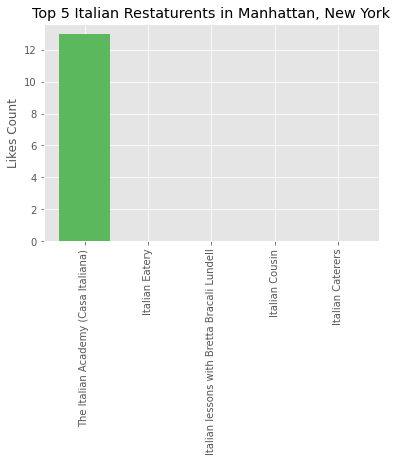

In [68]:
pos = np.arange(len(counts))
plt.figsize=(20, 8)
bar_width = 0.3
plt.bar(pos, counts, color='#5cb85c')
plt.xticks(pos, venueslist, rotation=90)
plt.ylabel("Likes Count")
plt.title("Top 5 Italian Restaturents in Manhattan, New York") 
plt.show()

In [69]:
map_venues = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(top5_venues['lat'], top5_venues['lng'], top5_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_venues)  
    
map_venues